In [245]:
from geopy.geocoders import Nominatim
import numpy as np
import rasterio
from PIL import Image
import matplotlib.pyplot as plt

In [268]:
#function to fetch lat and long given city name
def get_location(city):
    arr = {}
    geolocator = Nominatim(user_agent="megh_varta")
    location = geolocator.geocode(city)
    arr['city'], arr['lat'], arr['lon'] = location.raw['display_name'], np.float(location.raw['lat']), np.float(location.raw['lon'])
    return arr

#convert longitude and latitude to corresponding pixels
def cords_to_pixel(lon, lat):
    xs = (1074.0/36) * (lon-62.8)
    ys = 984-((984.0/33) * (lat-4.5))
    return (xs, ys)

Text(440.0396917000002, 877.273213090909, ' ')

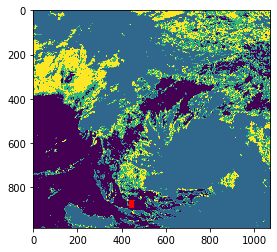

In [273]:
img = Image.open("CMK_Cropped_16.tif")

#city -> location
location = get_location("Kanyakumari")

#lon, lat -> pixels
pixel_cord = cords_to_pixel(location['lon'], location['lat'])

#display
plt.imshow(np.array(img))
plt.annotate(' ', xy=pixel_cord, xycoords='data',
             backgroundcolor='red',fontsize=4)